In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


In [7]:
data = pd.read_csv('weather.csv')

In [8]:
data

,Temperature,Outlook,Humidity,Windy,Played?
0,Mild,Sunny,80,No,Yes
1,Hot,Sunny,75,Yes,No
2,Hot,Overcast,77,No,Yes
3,Cool,Rain,70,No,Yes
4,Cool,Overcast,72,Yes,Yes
5,Mild,Sunny,77,No,No
6,Cool,Sunny,70,No,Yes
7,Mild,Rain,69,No,Yes
8,Mild,Sunny,65,Yes,Yes
9,Mild,Overcast,77,Yes,Yes


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Temperature  14 non-null     object
 1   Outlook      14 non-null     object
 2   Humidity     14 non-null     int64 
 3   Windy        14 non-null     object
 4   Played?      14 non-null     object
dtypes: int64(1), object(4)
memory usage: 688.0+ bytes


In [12]:
data_getdummy = pd.get_dummies(data=data , columns = ['Temperature' , 'Outlook' , 'Windy'])
data_getdummy

,Humidity,Played?,Temperature_Cool,Temperature_Hot,Temperature_Mild,Outlook_Overcast,Outlook_Rain,Outlook_Sunny,Windy_No,Windy_Yes
0,80,Yes,False,False,True,False,False,True,True,False
1,75,No,False,True,False,False,False,True,False,True
2,77,Yes,False,True,False,True,False,False,True,False
3,70,Yes,True,False,False,False,True,False,True,False
4,72,Yes,True,False,False,True,False,False,False,True
5,77,No,False,False,True,False,False,True,True,False
6,70,Yes,True,False,False,False,False,True,True,False
7,69,Yes,False,False,True,False,True,False,True,False
8,65,Yes,False,False,True,False,False,True,False,True
9,77,Yes,False,False,True,True,False,False,False,True


In [13]:
X = data_getdummy.drop('Played?' , axis=1)
Y = data_getdummy['Played?'] 
X_train , X_test , Y_train , Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 101)


In [31]:
dtree = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 4)


In [32]:
dtree.fit(X_train , Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [33]:
 predictions = dtree.predict(X_test)

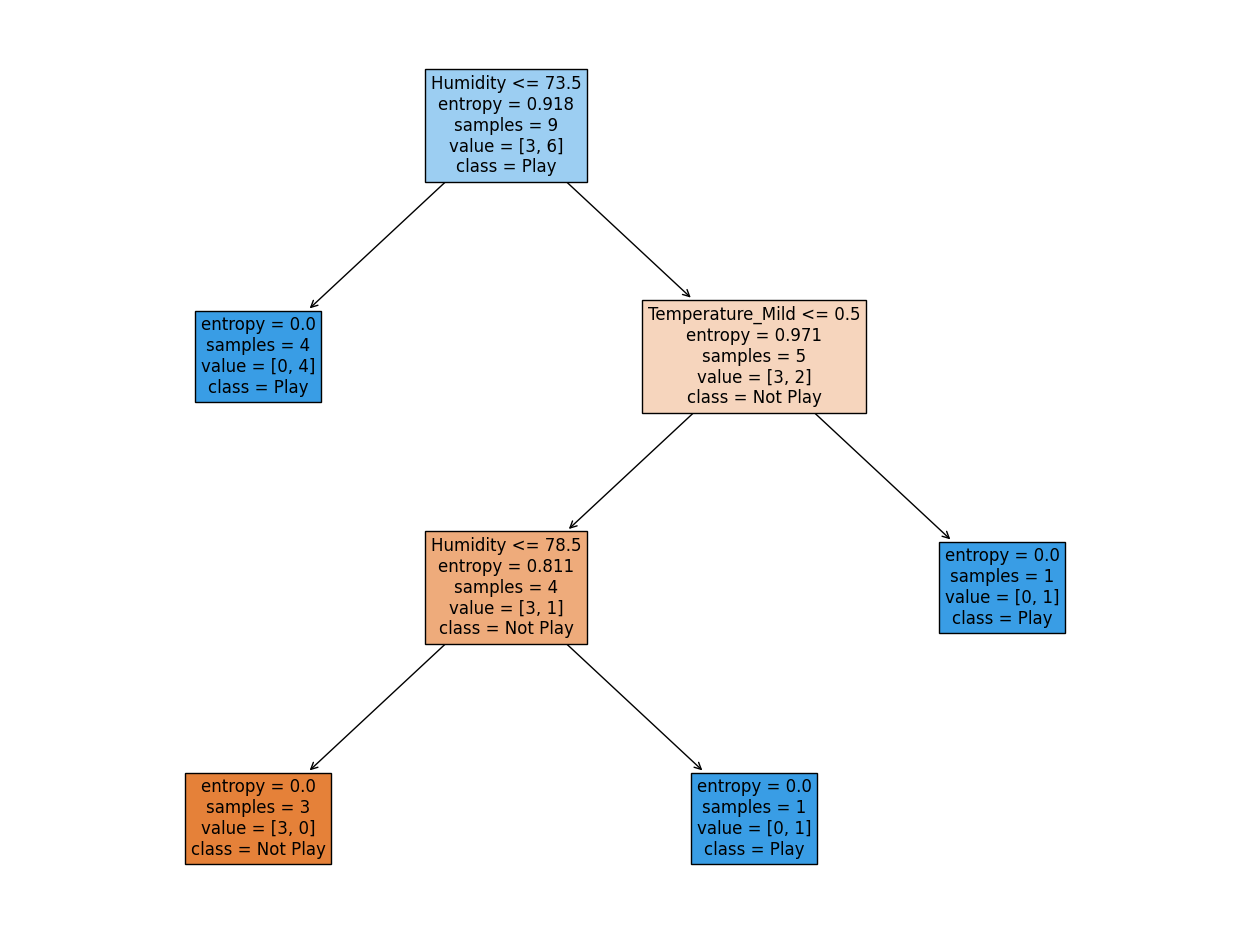

In [34]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,12))
a = plot_tree(dtree, feature_names=data_getdummy.columns, fontsize=12, filled=True, 
              class_names=['Not Play', 'Play'])